Welcome to the PM2.5 Forecasting System!


Enter the location for which you want the prediction:  ITO


C:\Users\hp\AppData\Local\Temp\ipykernel_17716\2260801084.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[target_column] = df[target_column].fillna(method='ffill').fillna(method='bfill')
C:\Users\hp\AppData\Local\Temp\ipykernel_17716\2260801084.py:52: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast.index = pd.date_range(start=start_datetime, periods=forecast_periods, freq="H")
C:\Users\hp\AppData\Local\Temp\ipykernel_17716\2260801084.py:56: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df.index = pd.date_range(start=start_datetime - pd.Timedelta(hours=len(df)), periods=len(df), freq="H")


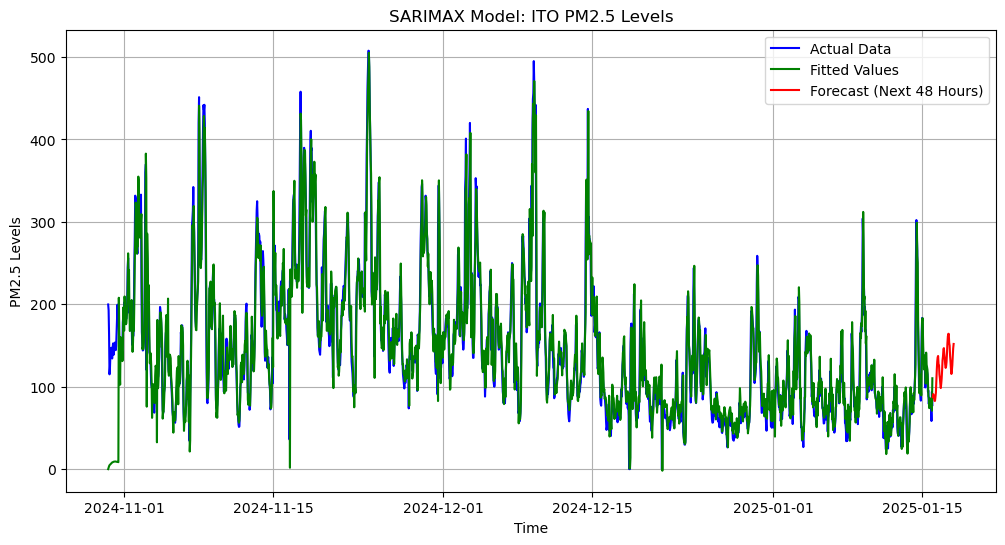

Forecast complete. Next 48-hour predictions:
2025-01-16 00:00:00     87.322789
2025-01-16 01:00:00     90.982748
2025-01-16 02:00:00     87.395397
2025-01-16 03:00:00     85.661921
2025-01-16 04:00:00     82.776632
2025-01-16 05:00:00     82.830252
2025-01-16 06:00:00     87.518086
2025-01-16 07:00:00     92.915224
2025-01-16 08:00:00    106.897231
2025-01-16 09:00:00    120.254083
2025-01-16 10:00:00    130.480154
2025-01-16 11:00:00    135.641300
2025-01-16 12:00:00    137.286576
2025-01-16 13:00:00    127.334956
2025-01-16 14:00:00    126.165737
2025-01-16 15:00:00    114.743935
2025-01-16 16:00:00    110.117067
2025-01-16 17:00:00    103.274492
2025-01-16 18:00:00     98.362178
2025-01-16 19:00:00    103.415598
2025-01-16 20:00:00    109.892135
2025-01-16 21:00:00    119.672765
2025-01-16 22:00:00    132.270894
2025-01-16 23:00:00    136.863854
2025-01-17 00:00:00    145.219922
2025-01-17 01:00:00    146.825582
2025-01-17 02:00:00    139.580722
2025-01-17 03:00:00    134.092635
202

In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define a function to preprocess the data
def preprocess_data(df, target_column):
    # Handle missing values
    df[target_column] = df[target_column].fillna(method='ffill').fillna(method='bfill')
    return df

# Define a function to fit the SARIMAX model
def fit_sarimax(data, order, seasonal_order):
    model = SARIMAX(data, order=order, seasonal_order=seasonal_order)
    results = model.fit()
    return results

# Define a function for forecasting
def forecast_future(results, steps):
    forecast = results.get_forecast(steps=steps)
    forecast_index = range(len(results.data.endog), len(results.data.endog) + steps)
    return forecast.predicted_mean, forecast_index

# User interaction to input location and predict future values
def interactive_forecast():
    print("Welcome to the PM2.5 Forecasting System!")
    location = input("Enter the location for which you want the prediction: ")

    # Placeholder: Load data for the location (Replace with actual location data logic)
    # Assuming the same dataframe `df` is used here for demonstration
    df = pd.read_csv('cleaned_pol_data.csv')  # Replace with actual location-based data loading

    # Preprocess data
    df = preprocess_data(df, 'PM2.5')

    # Fit SARIMAX model
    order = (1, 0, 4)
    seasonal_order = (1, 1, 1, 24)
    results = fit_sarimax(df['PM2.5'], order, seasonal_order)

    # Forecast future values
    # Define the starting datetime for the forecast
    start_datetime = pd.to_datetime("2025-01-16 00:00")
    forecast_periods = 48  # Number of periods to forecast

    # Generate the forecast using the fitted SARIMAX model
    forecast = results.predict(start=len(df), end=len(df)+forecast_periods-1, dynamic=True)

    # Replace the forecast index with a datetime index
    forecast.index = pd.date_range(start=start_datetime, periods=forecast_periods, freq="H")

    # Ensure the DataFrame has a datetime index
    if not pd.api.types.is_datetime64_any_dtype(df.index):
        df.index = pd.date_range(start=start_datetime - pd.Timedelta(hours=len(df)), periods=len(df), freq="H")

    # Plot actual values, fitted values, and forecast
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['PM2.5'], label='Actual Data', color='blue')  # Plot with proper index
    plt.plot(df.index, results.fittedvalues, label='Fitted Values', color='green')
    plt.plot(forecast.index, forecast, label='Forecast (Next 48 Hours)', color='red')

    plt.title(f'SARIMAX Model: {location} PM2.5 Levels')
    plt.xlabel('Time')
    plt.ylabel('PM2.5 Levels')
    plt.legend()
    plt.grid()
    plt.show()


    print("Forecast complete. Next 48-hour predictions:")
    print(forecast)

# Main pipeline
def main():
    pipeline = Pipeline([
        ('preprocessor', StandardScaler()),
        ('model', SARIMAX)
    ])

    interactive_forecast()

if __name__ == "__main__":
    main()


📍 Location: ITO
🪴 Soil Type: Sand loam
🌫️ Predicted PM2.5 Levels Before Planting: 
  - 5 Years: 405.75 
  - 10 Years: 470.37
🌱 Predicted PM2.5 Levels After Planting: 
  - 5 Years: 243.45 
  - 10 Years: 223.43
✅ Average Reduction in Pollution: 
  - 5 Years: 40.00% 
  - 10 Years: 52.50%

🌟 Best Plants for Your Location:
  Recommended plant species  Reduced pollution in 5 years (%)  \
0                    Peepal                              35.0   
1                    Banyan                              45.0   

   Reduced pollution in 10 years (%)  
0                               50.0  
1                               55.0  


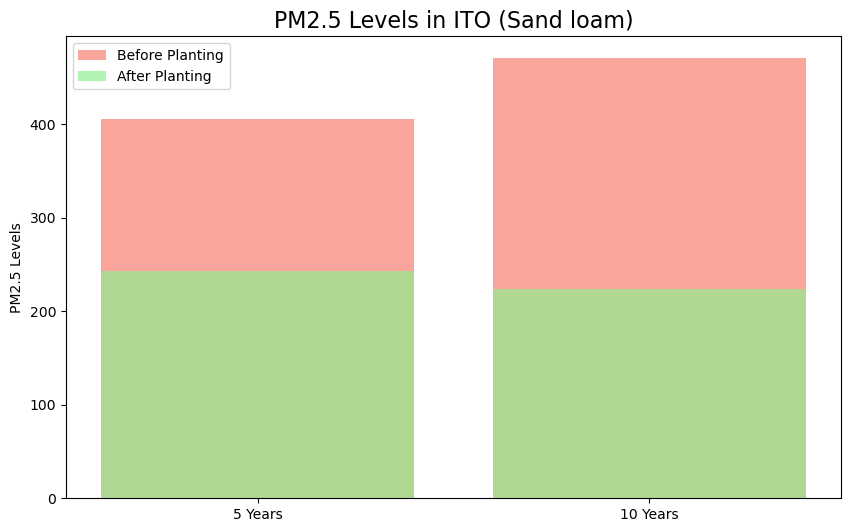

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the plant dataset
plant_data = pd.read_csv('updated_plant_data.csv')

# Strip any whitespace from column names
plant_data.columns = plant_data.columns.str.strip()

# Preprocessing function for the plant dataset
def preprocess_plant_data(data):
    def clean_percentage_range(value):
        try:
            value = value.replace('%', '')  # Remove '%' if present
            if '-' in value:  # If it's a range like "30-50"
                return np.mean(list(map(int, value.split('-'))))
            else:  # Single value
                return float(value)
        except Exception as e:
            print(f"Error processing value: {value}, Error: {e}")
            return np.nan

    data["Reduced pollution in 5 years (%)"] = data["Reduced pollution in 5 years (%)"].apply(clean_percentage_range)
    data["Reduced pollution in 10 years (%)"] = data["Reduced pollution in 10 years (%)"].apply(clean_percentage_range)
    return data

# Apply preprocessing
plant_data = preprocess_plant_data(plant_data)

# Function to calculate pollution levels over time with growth rate
def calculate_pollution_growth(initial_pm25, years, growth_rate):
    """
    Calculate PM2.5 levels over a given number of years with a growth rate.
    Formula: Future Value = Initial Value * (1 + Growth Rate) ^ Years
    """
    return initial_pm25 * (1 + growth_rate) ** years

# Visualization function (updated)
def visualize_results(location, soil_type, pm25_level, recommendations, growth_rate=0.03):
    """
    Visualize pollution levels before and after planting, accounting for growth rate.
    """
    # Calculate pollution levels before planting (with growth rate)
    pollution_5_years_before = calculate_pollution_growth(pm25_level, 5, growth_rate)
    pollution_10_years_before = calculate_pollution_growth(pm25_level, 10, growth_rate)

    # Calculate pollution reduction after planting
    avg_reduction_5_years = recommendations["Reduced pollution in 5 years (%)"].mean()
    avg_reduction_10_years = recommendations["Reduced pollution in 10 years (%)"].mean()
    pollution_5_years_after = pollution_5_years_before * (1 - avg_reduction_5_years / 100)
    pollution_10_years_after = pollution_10_years_before * (1 - avg_reduction_10_years / 100)

    # Display results
    print(f"\n📍 Location: {location}")
    print(f"🪴 Soil Type: {soil_type}")
    print(f"🌫️ Predicted PM2.5 Levels Before Planting: \n  - 5 Years: {pollution_5_years_before:.2f} \n  - 10 Years: {pollution_10_years_before:.2f}")
    print(f"🌱 Predicted PM2.5 Levels After Planting: \n  - 5 Years: {pollution_5_years_after:.2f} \n  - 10 Years: {pollution_10_years_after:.2f}")
    print(f"✅ Average Reduction in Pollution: \n  - 5 Years: {avg_reduction_5_years:.2f}% \n  - 10 Years: {avg_reduction_10_years:.2f}%")

    # Best plants for the location
    print("\n🌟 Best Plants for Your Location:")
    print(recommendations)

    # Visualization
    years = ["5 Years", "10 Years"]
    pollution_before = [pollution_5_years_before, pollution_10_years_before]
    pollution_after = [pollution_5_years_after, pollution_10_years_after]

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(years, pollution_before, color="salmon", alpha=0.7, label="Before Planting")
    ax.bar(years, pollution_after, color="lightgreen", alpha=0.7, label="After Planting")
    ax.set_title(f"PM2.5 Levels in {location} ({soil_type})", fontsize=16)
    ax.set_ylabel("PM2.5 Levels")
    ax.legend()
    plt.show()

# Updated model pipeline
def model2_pipeline(pm25_prediction, location, soil_type):
    # Recommend plants
    recommendations = recommend_plants(location, soil_type, pm25_prediction)
    # Visualize results with a 3% annual growth rate in PM2.5 levels
    visualize_results(location, soil_type, pm25_prediction, recommendations, growth_rate=0.03)

# Integration with Model 1
def pipeline_model1_to_model2(model1_output):
    predicted_pm25 = model1_output  # Example: 350
    location = "ITO"
    soil_type = "Sand loam"
    model2_pipeline(predicted_pm25, location, soil_type)

# Main Pipeline
def main_pipeline():
    model1_output = 350  # Replace with actual output
    pipeline_model1_to_model2(model1_output)

if __name__ == "__main__":
    main_pipeline()


🌱 Do you want to plant your own plant? If yes, enter plant name (or type 'no'):  Mango


🥳 Great! Planting Mango will reduce pollution by:
  ✔ 30.00% in 5 years
  ✔ 40.00% in 10 years
💡 If you'd like to maximize pollution reduction, consider planting Peepal.
✔ It reduces pollution by 35.00% in 5 years and 50.00% in 10 years.

📈 Visualization of Recommended Plants:


C:\Users\hp\AppData\Local\Temp\ipykernel_14576\2458896567.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Recommended plant species",


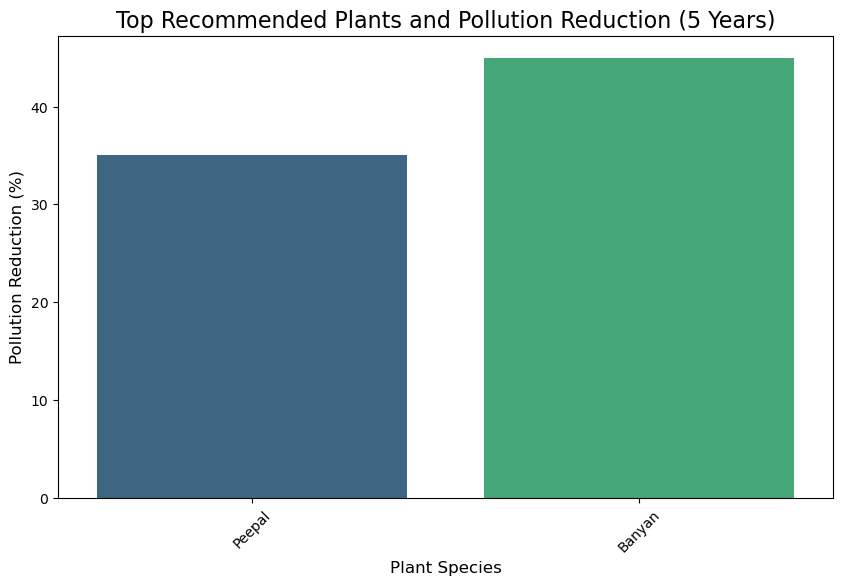

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the plant dataset
plant_data = pd.read_csv('updated_plant_data.csv')

# Strip any whitespace from column names
plant_data.columns = plant_data.columns.str.strip()

# Preprocessing function for the plant dataset
def preprocess_plant_data(data):
    def clean_percentage_range(value):
        try:
            value = value.replace('%', '')  # Remove '%'
            if '-' in value:  # If it's a range like "30-50"
                return np.mean(list(map(int, value.split('-'))))
            else:  # Single value
                return float(value)
        except Exception as e:
            print(f"Error processing value: {value}, Error: {e}")
            return np.nan

    data["Reduced pollution in 5 years (%)"] = data["Reduced pollution in 5 years (%)"].apply(clean_percentage_range)
    data["Reduced pollution in 10 years (%)"] = data["Reduced pollution in 10 years (%)"].apply(clean_percentage_range)
    return data

# Apply preprocessing
plant_data = preprocess_plant_data(plant_data)

# Function to recommend plants
def recommend_plants(location, soil_type, pm25_level):
    subset = plant_data[(plant_data["Location"] == location) & 
                        (plant_data["Soil Type"] == soil_type)]
    
    if pm25_level > 150:
        subset = subset[subset["Reduced pollution in 5 years (%)"] > 30]
    elif pm25_level > 50:
        subset = subset[subset["Reduced pollution in 5 years (%)"] > 20]

    return subset[["Recommended plant species", 
                   "Reduced pollution in 5 years (%)", 
                   "Reduced pollution in 10 years (%)"]]

# Function to visualize results
def visualize_recommendations(recommendations):
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Recommended plant species", 
                y="Reduced pollution in 5 years (%)", 
                data=recommendations, palette="viridis")
    plt.title("Top Recommended Plants and Pollution Reduction (5 Years)", fontsize=16)
    plt.ylabel("Pollution Reduction (%)", fontsize=12)
    plt.xlabel("Plant Species", fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

# Model 3 Pipeline
def model3_pipeline(model1_output, model2_recommendations):
    # Step 1: User Input
    user_plant_choice = input("\U0001F331 Do you want to plant your own plant? If yes, enter plant name (or type 'no'): ").strip()
    if user_plant_choice.lower() != 'no':
        user_plant = plant_data[plant_data["Recommended plant species"].str.contains(user_plant_choice, case=False, na=False)]

        if not user_plant.empty:
            reduction_5_years = user_plant.iloc[0]["Reduced pollution in 5 years (%)"]
            reduction_10_years = user_plant.iloc[0]["Reduced pollution in 10 years (%)"]

            print(f"\U0001F973 Great! Planting {user_plant_choice} will reduce pollution by:")
            print(f"  \u2714 {reduction_5_years:.2f}% in 5 years")
            print(f"  \u2714 {reduction_10_years:.2f}% in 10 years")
        else:
            print(f"\U0001F937 Sorry, {user_plant_choice} is not in our dataset. Consider planting one of the recommended plants below:")

    # Step 2: Suggest Best Alternative Plant
    best_alternative = model2_recommendations.iloc[0]
    print(f"\U0001F4A1 If you'd like to maximize pollution reduction, consider planting {best_alternative['Recommended plant species']}.")
    print(f"\u2714 It reduces pollution by {best_alternative['Reduced pollution in 5 years (%)']:.2f}% in 5 years and {best_alternative['Reduced pollution in 10 years (%)']:.2f}% in 10 years.")

    # Step 3: Visualization
    print("\n\U0001F4C8 Visualization of Recommended Plants:")
    visualize_recommendations(model2_recommendations)

# Example Integration with Model 1 and Model 2
def pipeline_model1_to_model3():
    # Example Model 1 Output
    predicted_pm25 = 340  # Replace with actual output
    location = "ITO"
    soil_type = "Sand loam"

    # Get recommendations from Model 2
    model2_recommendations = recommend_plants(location, soil_type, predicted_pm25)

    # Pass data to Model 3
    model3_pipeline(predicted_pm25, model2_recommendations)

if __name__ == "__main__":
    pipeline_model1_to_model3()
